In [36]:
import pandas as pans
import numpy as nums
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from timeit import default_timer as timer

import matplotlib.pyplot as matplot
import seaborn as seans

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import hamming_loss
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import recall_score
import statistics


from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

import warnings
import xgboost as xgbos

warnings.filterwarnings('ignore')
%matplotlib inline
train_Data = pans.read_csv("/content/sample_data/train.csv")
test_Data = pans.read_csv("/content/sample_data/test.csv")
test_y_Data = pans.read_csv("/content/sample_data/test_labels.csv")
train_Data.head()



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [37]:
train_Data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
test_Data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [23]:
test_y_Data.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [24]:
train_Data.shape

(159571, 8)

In [25]:
test_Data.shape

(153164, 2)

<Axes: xlabel='comment_text'>

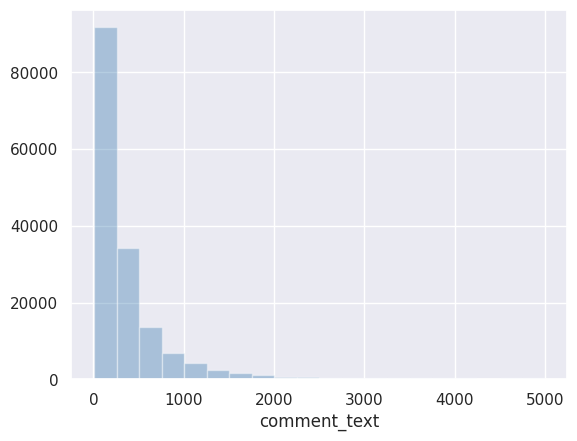

In [26]:
seans.set(color_codes=True)
comment_length = train_Data.comment_text.str.len()
seans.distplot(comment_length, kde=False, bins=20, color="steelblue")

In [27]:
# Subsetting labels from the training data
train_Data_labels = train_Data[['toxic', 'severe_toxic',
                      'obscene', 'threat', 'insult', 'identity_hate']]
label_Data_count = train_Data_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

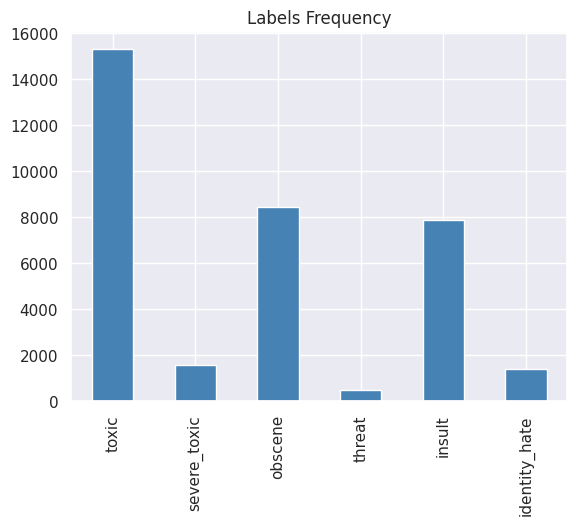

In [28]:
label_Data_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

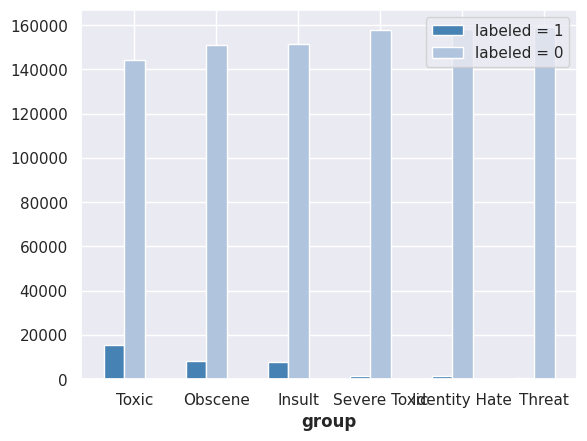

In [29]:
# Code to draw bar graph for visualising distribution of classes within each label.
bar_Width = 0.25

bars_1 = [sum(train_Data['toxic'] == 1), sum(train_Data['obscene'] == 1), sum(train_Data['insult'] == 1), sum(train_Data['severe_toxic'] == 1),
         sum(train_Data['identity_hate'] == 1), sum(train_Data['threat'] == 1)]
bars_2 = [sum(train_Data['toxic'] == 0), sum(train_Data['obscene'] == 0), sum(train_Data['insult'] == 0), sum(train_Data['severe_toxic'] == 0),
         sum(train_Data['identity_hate'] == 0), sum(train_Data['threat'] == 0)]

r_1 = nums.arange(len(bars_1))
r_2 = [x + bar_Width for x in r_1]

matplot.bar(r_1, bars_1, color='steelblue', width=bar_Width, label='labeled = 1')
matplot.bar(r_2, bars_2, color='lightsteelblue', width=bar_Width, label='labeled = 0')

matplot.xlabel('group', fontweight='bold')
matplot.xticks([r + bar_Width for r in range(len(bars_1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
matplot.legend()
matplot.show()

In [41]:
# example of clean comment
train_Data.comment_text[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [40]:
# example of toxic comment
train_Data[train_Data.toxic == 1].iloc[3, 1]

"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!"

<Axes: >

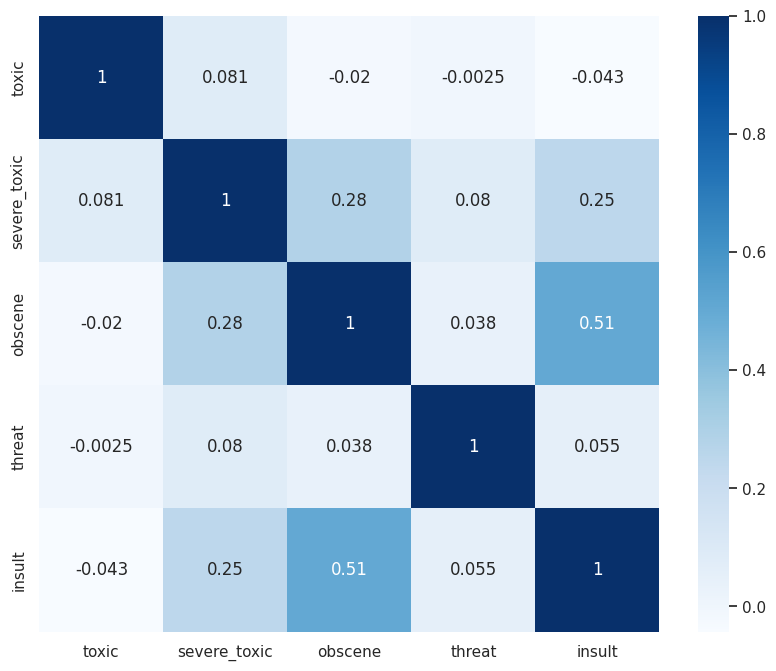

In [32]:
# Cross correlation matrix across labels
row_sums = train_Data.iloc[:, 2:].sum(axis=1)
temper = train_Data.iloc[:, 2:-1]
train_corr_Data = temper[row_sums > 0]
corr_Data = train_corr_Data.corr()
matplot.figure(figsize=(10, 8))
seans.heatmap(corr_Data,
            xticklabels=corr_Data.columns.values,
            yticklabels=corr_Data.columns.values, annot=True, cmap="Blues")

In [33]:
def W_Cloud(token):
    """
    Visualize the most common words contributing to the token.
    """
    threatContext = train_Data[train_Data[token] == 1]
    threatText = threatContext.comment_text
    negText = pans.Series(threatText).str.cat(sep=' ')
    word_cloud = WordCloud(width=1600, height=800,
                          max_font_size=200).generate(negText)

    matplot.figure(figsize=(15, 10))
    matplot.imshow(word_cloud.recolor(colormap="Blues"), interpolation='bilinear')
    matplot.axis("off")
    matplot.title(f"Most common words assosiated with {token} comment", size=20)
    matplot.show()

Choose a class to visualize the most common words contributing to the class:Obscene


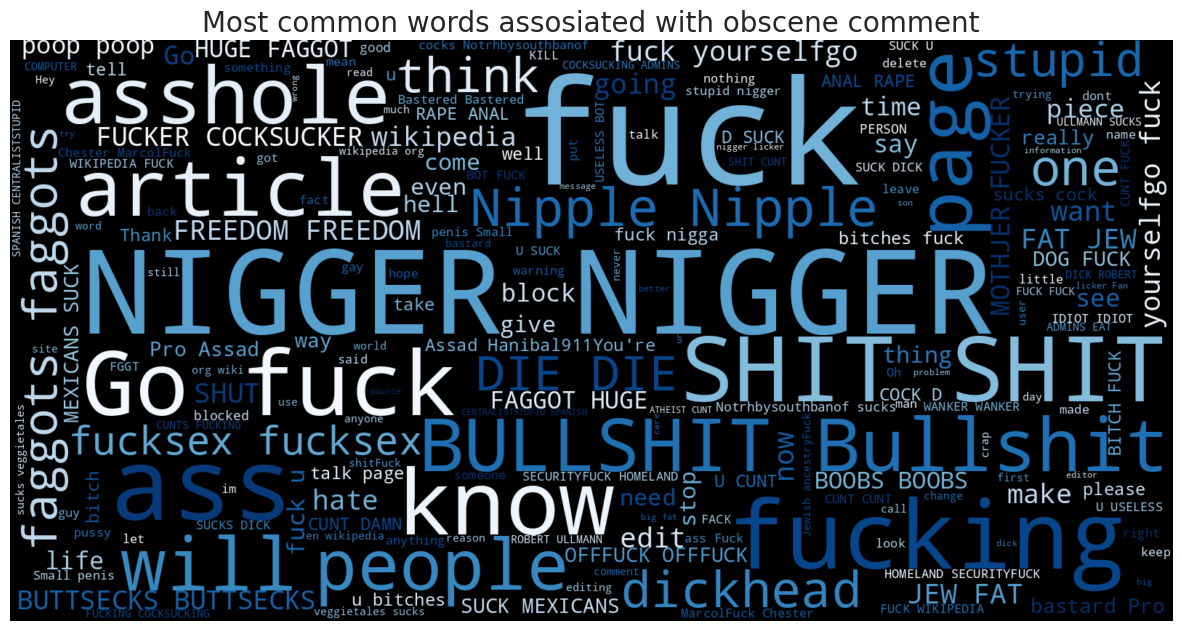

In [35]:
# interactive visual : enter the label name.
token = input(
    'Choose a class to visualize the most common words contributing to the class:')
W_Cloud(token.lower())